## Algorithme des k plus proches voisins

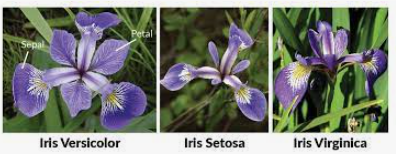
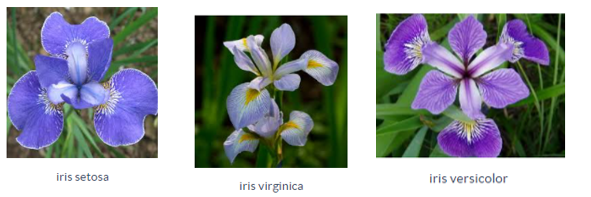

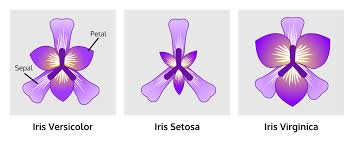

Dans le fichier Iris.csv, la collonne "Species" 0= setosa, 1=versicolor et 2=virginica

0) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [2]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [3]:
#ouverture du fichier csv avec séparation des données par le ; et précision que la virgule est le séparateur décimal
df=pd.read_csv('iris.csv',sep=";",decimal=',')
df

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
149,5.1,1.8,2


2) Créer trois listes(array) petal_length,petal_width et species

In [4]:

petal_length=np.array(df['petal_length'])
petal_width=np.array(df['petal_width'])
species=np.array(df['species'])


3) Tracer sur la même figure les nuages de point de "petal_width" en fonction de "petal_length". Les points seront de couleurs différentes selon leur catégorie respective dans "species" 

Les 3 couleurs suivantes sont à utiliser: vert pour setosa, rouge pour versicolor et bleu pour virbinica 

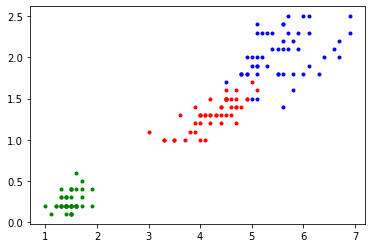

In [15]:
for i in range(len(petal_width)):
    #on suppose que 0,1,2 correspond respectivement au setosa, versicolor et virbinica
    if species[i]==0:
        plt.plot(petal_length[i],petal_width[i],'g.')
    elif species[i]==1:
        plt.plot(petal_length[i],petal_width[i],'r.')
    else:
        plt.plot(petal_length[i],petal_width[i],'b.')
plt.show()

4) Placer sur la figure précédente un point noir correspondant à un nouveau échantillon de fleur dont la pétale a les dimensions suivantes: largeur = 0,5 cm et longueur = 2 cm

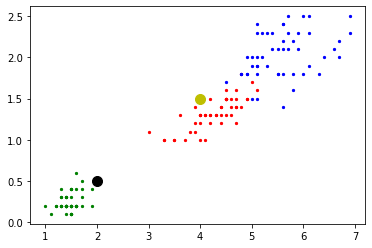

<Figure size 10800x360 with 0 Axes>

In [18]:
for i in range(len(petal_width)):
    if species[i]==0:
        plt.scatter(petal_length[i],petal_width[i],color='g',s=5)
    elif species[i]==1:
        plt.scatter(petal_length[i],petal_width[i],color='r',s=5)
    else:
        plt.scatter(petal_length[i],petal_width[i],color='b',s=5)

#Ajout d'un point noircorrespondant à l'échantillon de fleur
plt.scatter([2],[0.5],color='k',s=100)

#Ajout d'un point jaune qui servira pour le test du modèle
plt.scatter([4],[1.5],color='y',s=100)
plt.figure(figsize=(150,5))
plt.show()

5) Entrainement, test en utilisant l'algorithme KNN

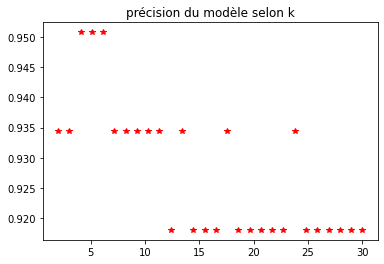

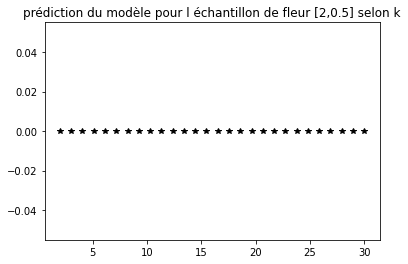

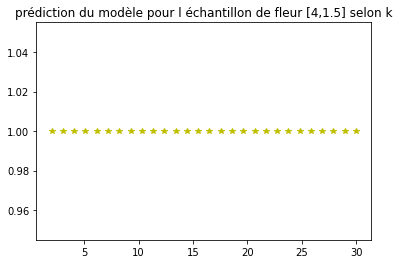

In [21]:
X=df[['petal_length','petal_width']]
Y=df['species']

from sklearn.model_selection import train_test_split
#Séparation des données en 4 listes avec des données test de 40%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

from sklearn.neighbors import  KNeighborsClassifier

#liste pour rentrer la précision du modèle pour chaque k
precision_k=[]

#liste pour rentrer la précision du modèle pour chaque k
ls_prediction=[]

for k in range(2,30):
    knn = KNeighborsClassifier(n_neighbors = k )
    #entrainement
    knn.fit(X_train,Y_train)
    precision_k.append((knn.score(X_test,Y_test)))
    prediction=knn.predict([[2,0.5]])
    ls_prediction.append(prediction)

plt.plot(np.linspace(2,30,28),precision_k,'r*')
plt.title('précision du modèle selon k')
plt.show()
#On observe bien une variation de la precision selon k mais qui rest vraiment haute 

plt.plot(np.linspace(2,30,28),ls_prediction,'k*')
plt.title('prédiction du modèle pour l échantillon de fleur [2,0.5] selon k')
plt.show()
#On a une prédiction constante qui est logique avec ce qu'on observe sur la figure

#On réalise avec un échantillon de fleur différent

ls_prediction1=[]

for k in range(2,30):
    knn = KNeighborsClassifier(n_neighbors = k )
    #entrainement
    knn.fit(X_train,Y_train)
    prediction=knn.predict([[4,1.5]])
    ls_prediction1.append(prediction)

plt.plot(np.linspace(2,30,28),ls_prediction1,'y*')
plt.title('prédiction du modèle pour l échantillon de fleur [4,1.5] selon k')
plt.show()
#On a une prédiction constante qui est logique avec ce qu'on observe sur la figure

